In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
import sys

In [89]:
def my_DBSCAN(data, epsilon, minPts):
    #epsilon is the neighbourhood distance
    #minPts is the  minimum number of points required to form a cluster   (required density)
    color = ['r','g','b','y','c','m','k','w']
    #array to keep track of visited nodes (Size of this array will be equal to number of datapoints)
    visited = []
    clusters = {}
    clus_num = 0;
    # for each datapoint in database
    for i in range(0,data.shape[0]):
        if(data[i] not in np.array(visited)):
            visited.append(data[i])
            clus = []
            
            #now we need to calculate the distance between this ith datapoint and all other datapoints
            for n in range(0, data.shape[0]):
                #if distance is less than epsilon then we add this datapoint to cluster
                if(LA.norm(data[i]-data[n]) <= epsilon):
                    clus.append(data[n])
            
            #if length of clus is greater than minPts, then add it to clusters{} else drop it
            
            if(len(clus) >= minPts):
                print(len(clus))
                print("Yes! Lets form a cluster")
                #expanding the cluster
                for point in clus:
                    if (point not in np.array(visited)):
                        visited.append(point)
                        for n in range(0, data.shape[0]):
                            #if distance between point and this nth datapoint is less than epsilon
                            if(LA.norm(data[n]-point)<=epsilon and data[n] not in np.array(clus)):
                                    clus.append(data[n])
                clusters[clus_num] = clus
                clus_num = clus_num + 1
    
    fig = plt.figure()
    fig.suptitle('Original Data')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(data[:,0],data[:,1])
    
    
    fig1 = plt.figure()
    fig1.suptitle('Clustered Data')
    ax = fig1.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for iter in clusters.keys():
        ax.scatter(np.array(clusters[iter])[:,0],np.array(clusters[iter])[:,1])
   
    
    return(clusters)

In [81]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

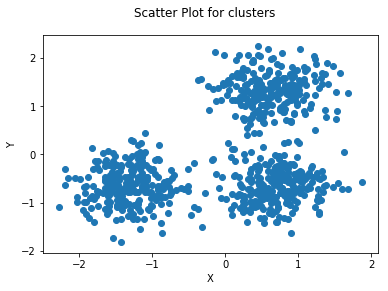

In [82]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(X[:,0],X[:,1])

/Users/hhundiwala/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


27
Yes! Lets form a cluster
30
Yes! Lets form a cluster
11
Yes! Lets form a cluster


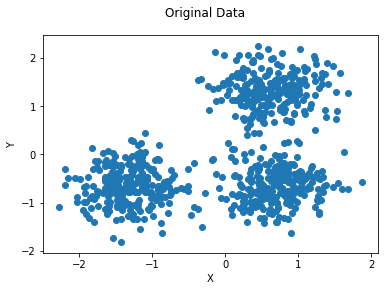

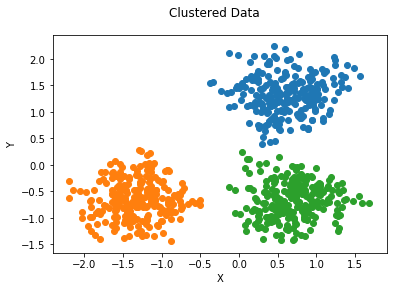

In [90]:
c = my_DBSCAN(X,0.2,10)

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


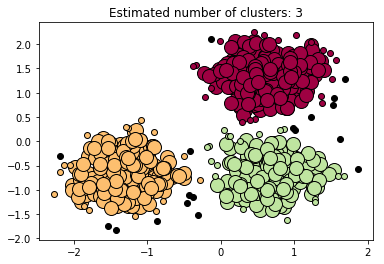

In [57]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()